### WEB CRUSADERS

C:\Users\kenneth jason\AppData\Local\Temp\ipykernel_13252\4251748971.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('newdatasheet.csv')


        CriminalityProbability   Prediction
0                    13.867433   Not likely
1                    20.400000  Most likely
2                    20.400000  Most likely
3                    20.400000  Most likely
4                    20.400000  Most likely
...                        ...          ...
670138               12.338234   Not likely
670139                8.058865   Not likely
670140               12.538234   Not likely
670141               20.400000  Most likely
670142               20.600000  Most likely

[670143 rows x 2 columns]


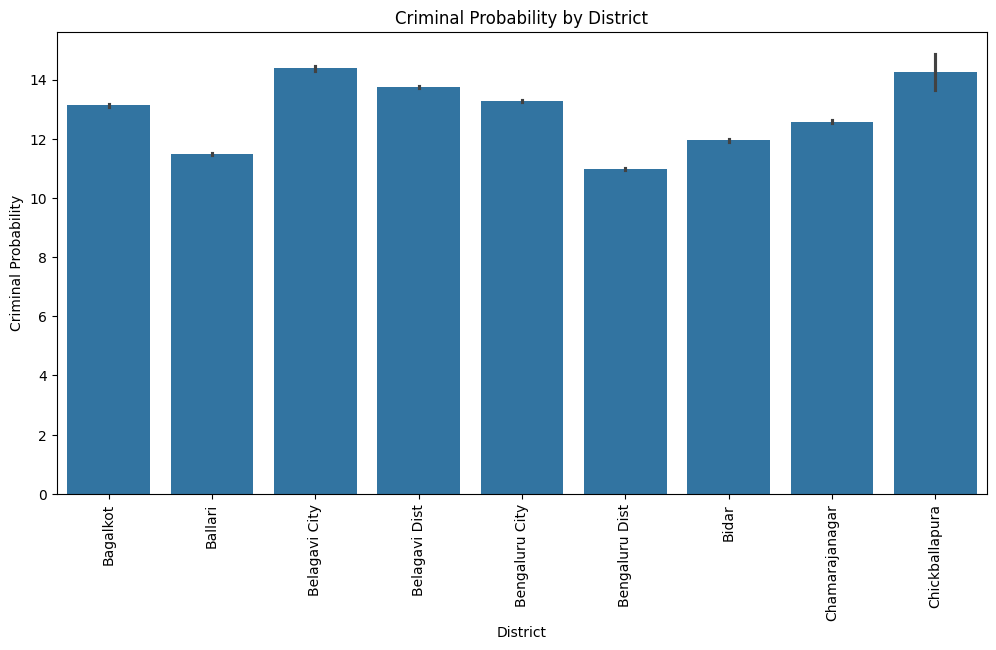

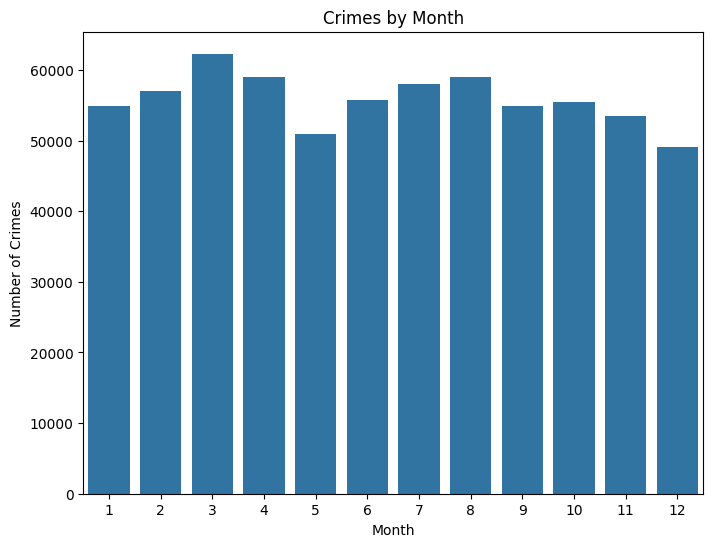

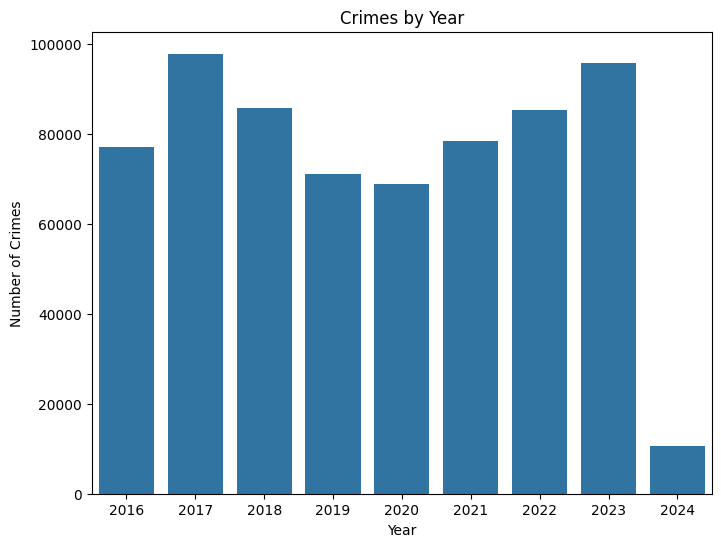

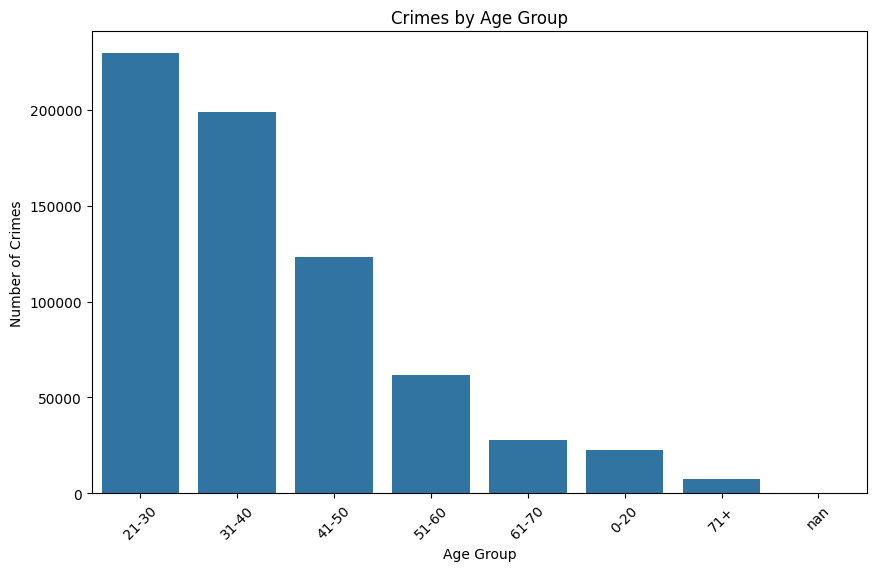

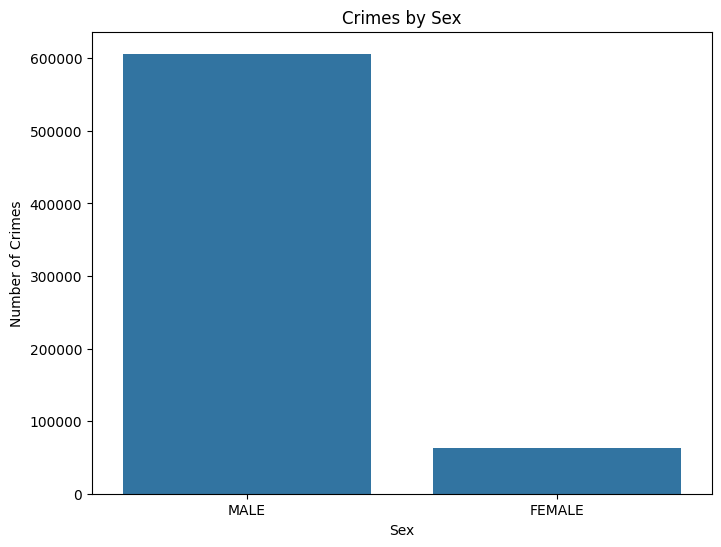

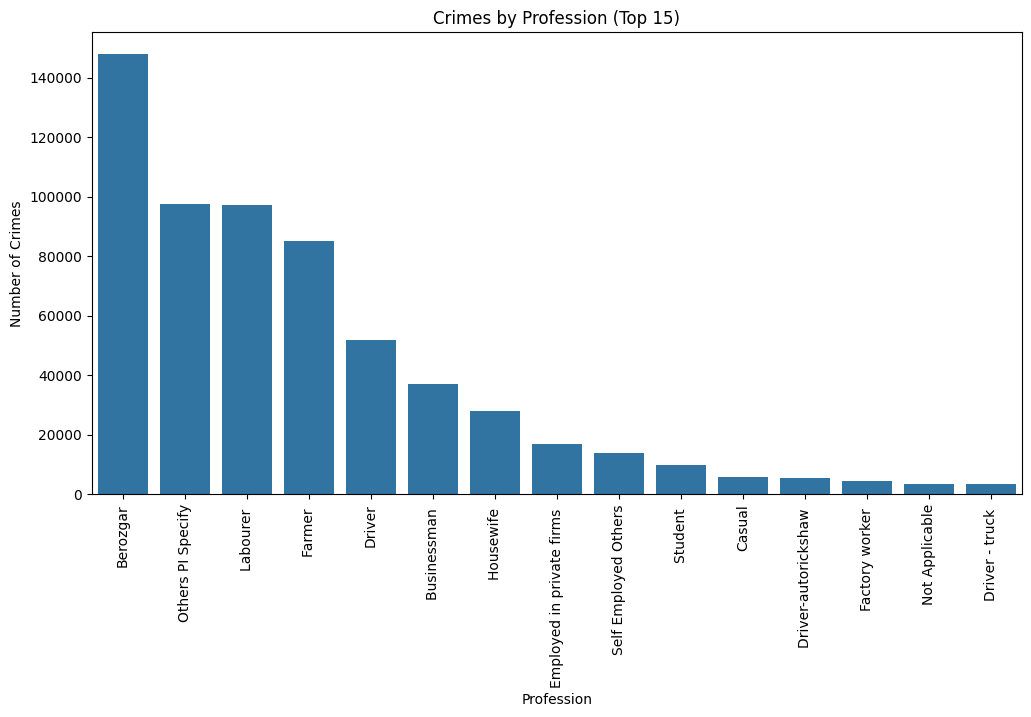

In [3]:
import pandas as pd # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt # Importing matplotlib for plotting
import seaborn as sns # Importing seaborn for enhanced visualization

# Load the dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('newdatasheet.csv')

# Adjust age probability values to increase importance
age_probabilities = {
    '0-20': 0.1,
    '21-30': 0.3,
    '31-40': 0.5,
    '41-50': 0.6,
    '51-60': 0.5,
    '61-70': 0.3,
    '71+': 0.1
}

# Calculate profession occurrence counts
profession_counts = data['Profession'].value_counts()

# Select the top 15 occurring professions
top_professions = profession_counts.head(15).index.tolist()

# Assign values to professions based on occurrence counts
profession_values = {}
max_value = 20
min_value = 1
max_count = profession_counts.max()
min_count = profession_counts.min()
for profession, count in profession_counts.items():
    if profession in top_professions:
        scaled_value = min_value + (count - min_count) * (max_value - min_value) / (max_count - min_count)
        profession_values[profession] = scaled_value

# Clean up 'AgeGroup' column and ensure all values are strings
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Considering gender distribution
total_accused = len(data)
male_count = data['Sex'].value_counts().get('MALE', 0)
female_count = data['Sex'].value_counts().get('FEMALE', 0)
male_probability = male_count / total_accused
female_probability = female_count / total_accused

# Define the additional contribution for gender
male_contribution = 0.1  # Adjust as needed
female_contribution = 0.05  # Adjust as needed

# Group age into predefined age ranges
age_bins = [0, 20, 30, 40, 50, 60, 70, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
data['AgeGroup'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False).astype(str)

# Combine probabilities
data['CriminalityProbability'] = (data['AgeGroup'].map(age_probabilities) + 
                                  data['Profession'].map(profession_values) +
                                  np.where(data['Sex'] == 'MALE', male_contribution, female_contribution))

# Generate predictions
threshold_probability = 15  # Adjust threshold as needed
data['Prediction'] = data['CriminalityProbability'] >= threshold_probability

# Output results in terms of labels based on threshold probability
def label_probability(probability):
    if probability >= threshold_probability:
        return "Most likely"
    else:
        return "Not likely"

# Apply the function to the CriminalityProbability column
data['Prediction'] = data['CriminalityProbability'].apply(label_probability)

# Output the CriminalityProbability and Prediction for each data entry
print(data[['CriminalityProbability', 'Prediction']])

# View criminal probability by district
plt.figure(figsize=(12, 6))
sns.barplot(x='District_Name', y='CriminalityProbability', data=data, estimator=np.mean)
plt.title('Criminal Probability by District')
plt.xlabel('District')
plt.ylabel('Criminal Probability')
plt.xticks(rotation=90)
plt.show()

# Graphical analysis of crimes by month
plt.figure(figsize=(8, 6))
sns.countplot(x='Month', data=data)
plt.title('Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

# Graphical analysis of crimes by year
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=data)
plt.title('Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

# Graphical analysis of crimes by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=data, order=data['AgeGroup'].value_counts().index)
plt.title('Crimes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Graphical analysis of crimes by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data[data['Sex'].isin(['MALE', 'FEMALE'])])
plt.title('Crimes by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Crimes')
plt.show()

# Crimes by profession (Top 15 occurring professions)
plt.figure(figsize=(12, 6))
sns.countplot(x='Profession', data=data[data['Profession'].isin(top_professions)], order=top_professions)
plt.title('Crimes by Profession (Top 15)')
plt.xlabel('Profession')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()